In [119]:
import turicreate as tc

# Read Data

In [120]:
products = tc.SFrame('~/Course/Week 3/m_bfaa91c17752f745.frame_idx')

In [121]:
products.head()

name,review,rating
Planetwise Flannel Wipes,"These flannel wipes areOK, but in my opinion ...",3.0
Planetwise Wipe Pouch,it came early and was notdisappointed. i love ...,5.0
Annas Dream Full Quiltwith 2 Shams ...,Very soft and comfortableand warmer than it ...,5.0
Stop Pacifier Suckingwithout tears with ...,This is a product wellworth the purchase. I ...,5.0
Stop Pacifier Suckingwithout tears with ...,All of my kids have criednon-stop when I tried to ...,5.0
Stop Pacifier Suckingwithout tears with ...,"When the Binky Fairy cameto our house, we didn't ...",5.0
A Tale of Baby's Dayswith Peter Rabbit ...,"Lovely book, it's boundtightly so you may no ...",4.0
"Baby Tracker&reg; - DailyChildcare Journal, ...",Perfect for new parents.We were able to keep ...,5.0
"Baby Tracker&reg; - DailyChildcare Journal, ...",A friend of mine pinnedthis product on Pinte ...,5.0
"Baby Tracker&reg; - DailyChildcare Journal, ...",This has been an easy wayfor my nanny to record ...,4.0


# Defining our feature of selected words

In [122]:
products['word_count'] = tc.text_analytics.count_words(products['review'])

In [123]:
products[0:3]

name,review,rating,word_count
Planetwise Flannel Wipes,"These flannel wipes areOK, but in my opinion ...",3.0,"{'handles': 1.0,'stripping': 1.0, ..."
Planetwise Wipe Pouch,it came early and was notdisappointed. i love ...,5.0,"{'recommend': 1.0,'highly': 1.0, ..."
Annas Dream Full Quiltwith 2 Shams ...,Very soft and comfortableand warmer than it ...,5.0,"{'quilt': 1.0, 'of': 1.0,'the': 1.0, 'than': 1.0, ..."


In [124]:
def awesome_count(column_dict):
    if 'awesome' in column_dict:
        return column_dict['awesome']
    else:
        return 0      

In [125]:
products['awesome'] = products['word_count'].apply(lambda x : awesome_count(x))

In [126]:
products[0:3]

name,review,rating,word_count,awesome
Planetwise Flannel Wipes,"These flannel wipes areOK, but in my opinion ...",3.0,"{'handles': 1.0,'stripping': 1.0, ...",0.0
Planetwise Wipe Pouch,it came early and was notdisappointed. i love ...,5.0,"{'recommend': 1.0,'highly': 1.0, ...",0.0
Annas Dream Full Quiltwith 2 Shams ...,Very soft and comfortableand warmer than it ...,5.0,"{'quilt': 1.0, 'of': 1.0,'the': 1.0, 'than': 1.0, ...",0.0


In [127]:
selected_words = ['awesome', 'great', 'fantastic', 'amazing', 'love', 'horrible', 'bad', 'terrible', 'awful', 'wow', 'hate']
def selected_count(column_dict,val):
    if val in column_dict:
        return column_dict[val]
    else:
        return 0
    

In [128]:
selected_words = ['awesome', 'great', 'fantastic', 'amazing', 'love', 'horrible', 'bad', 'terrible', 'awful', 'wow', 'hate']

for word in selected_words:
    products[word] = products['word_count'].apply(lambda x: selected_count(x,word))

In [129]:
selected_words

['awesome',
 'great',
 'fantastic',
 'amazing',
 'love',
 'horrible',
 'bad',
 'terrible',
 'awful',
 'wow',
 'hate']

In [130]:
products[0:3]

Columns:
	name	str
	review	str
	rating	float
	word_count	dict
	awesome	float
	great	float
	fantastic	float
	amazing	float
	love	float
	horrible	int
	bad	float
	terrible	int
	awful	int
	wow	int
	hate	int

Rows: 3

Data:
+-------------------------------+-------------------------------+--------+
|              name             |             review            | rating |
+-------------------------------+-------------------------------+--------+
|    Planetwise Flannel Wipes   | These flannel wipes are OK... |  3.0   |
|     Planetwise Wipe Pouch     | it came early and was not ... |  5.0   |
| Annas Dream Full Quilt wit... | Very soft and comfortable ... |  5.0   |
+-------------------------------+-------------------------------+--------+
+-------------------------------+---------+-------+-----------+---------+------+
|           word_count          | awesome | great | fantastic | amazing | love |
+-------------------------------+---------+-------+-----------+---------+------+
| {'handles': 1.0, 'strippin... |   0.0   |  0.0  |    0.0    |   0.0   | 0.0  |
| {'recommend': 1.0, 'highly... |   0.0   |  0.0  |    0.0    |   0.0   | 1.0  |
| {'quilt': 1.0, 'of': 1.0, ... |   0.0   |  0.0  |    0.0    |   0.0   | 0.0  |
+-------------------------------+---------+-------+-----------+---------+------+
+----------+-----+----------+-------+-----+------+
| horrible | bad | terrible | awful | wow | hate |
+----------+-----+----------+-------+-----+------+
|    0     | 0.0 |    0     |   0   |  0  |  0   |
|    0     | 0.0 |    0     |   0   |  0  |  0   |
|    0     | 0.0 |    0     |   0   |  0  |  0   |
+----------+-----+----------+-------+-----+------+
[3 rows x 15 columns]

In [172]:
products[selected_words].show()

Materializing SFrame

# Define our target variable

In [131]:
products['rating'].show()

Materializing SArray

In [132]:
products = products[products['rating']!=3]

In [133]:
(products['rating'] == 3)

dtype: int
Rows: ?
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ... ]

In [134]:
products['sentiment'] = products['rating']>=4

In [135]:
products[0:5]

Columns:
	name	str
	review	str
	rating	float
	word_count	dict
	awesome	float
	great	float
	fantastic	float
	amazing	float
	love	float
	horrible	int
	bad	float
	terrible	int
	awful	int
	wow	int
	hate	int
	sentiment	int

Rows: 5

Data:
+-------------------------------+-------------------------------+--------+
|              name             |             review            | rating |
+-------------------------------+-------------------------------+--------+
|     Planetwise Wipe Pouch     | it came early and was not ... |  5.0   |
| Annas Dream Full Quilt wit... | Very soft and comfortable ... |  5.0   |
| Stop Pacifier Sucking with... | This is a product well wor... |  5.0   |
| Stop Pacifier Sucking with... | All of my kids have cried ... |  5.0   |
| Stop Pacifier Sucking with... | When the Binky Fairy came ... |  5.0   |
+-------------------------------+-------------------------------+--------+
+-------------------------------+---------+-------+-----------+---------+------+
|           word_count          | awesome | great | fantastic | amazing | love |
+-------------------------------+---------+-------+-----------+---------+------+
| {'recommend': 1.0, 'highly... |   0.0   |  0.0  |    0.0    |   0.0   | 1.0  |
| {'quilt': 1.0, 'of': 1.0, ... |   0.0   |  0.0  |    0.0    |   0.0   | 0.0  |
| {'tool': 1.0, 'clever': 1.... |   0.0   |  0.0  |    0.0    |   0.0   | 2.0  |
| {'rock': 1.0, 'many': 1.0,... |   0.0   |  1.0  |    0.0    |   0.0   | 1.0  |
| {'thumb': 1.0, 'or': 1.0, ... |   0.0   |  1.0  |    0.0    |   0.0   | 0.0  |
+-------------------------------+---------+-------+-----------+---------+------+
+----------+-----+----------+-------+-----+------+-----------+
| horrible | bad | terrible | awful | wow | hate | sentiment |
+----------+-----+----------+-------+-----+------+-----------+
|    0     | 0.0 |    0     |   0   |  0  |  0   |     1     |
|    0     | 0.0 |    0     |   0   |  0  |  0   |     1     |
|    0     | 0.0 |    0     |   0   |  0  |  0   |     1     |
|    0     | 0.0 |    0     |   0   |  0  |  0   |     1     |
|    0     | 0.0 |    0     |   0   |  0  |  0   |     1     |
+----------+-----+----------+-------+-----+------+-----------+
[5 rows x 16 columns]

# Train/Test Split

In [136]:
train_data, test_data = products.random_split(0.8, seed = 0)

In [137]:
train_data.shape

(133448, 16)

In [138]:
test_data.shape

(33304, 16)

In [139]:
33304*4          ## 0.8 Train is 4*0.2 Test

133216

# Use the defined features

In [140]:
features = selected_words

In [141]:
model = tc.logistic_classifier.create(train_data, target='sentiment', features=features, validation_set=test_data)

Logistic regression:

--------------------------------------------------------

Number of examples          : 133448

Number of classes           : 2

Number of feature columns   : 11

Number of unpacked features : 11

Number of coefficients      : 12

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+-------------------+---------------------+

| Iteration | Passes   | Elapsed Time | Training Accuracy | Validation Accuracy |

+-----------+----------+--------------+-------------------+---------------------+

| 1         | 2        | 0.057981     | 0.847401          | 0.845874            |

| 2         | 3        | 0.101904     | 0.847514          | 0.846085            |

| 3         | 4        | 0.144382     | 0.847626          | 0.846115            |

| 4         | 5        | 0.188039     | 0.847708          | 0.846385            |

| 5         | 6        | 0.231091     | 0.847708          | 0.846385            |

| 6         | 7        | 0.273095     | 0.847708          | 0.846385            |

+-----------+----------+--------------+-------------------+---------------------+

SUCCESS: Optimal solution found.

In [142]:
roc = model.evaluate(test_data,metric='roc_curve')
roc

{'roc_curve': Columns:
 	threshold	float
 	fpr	float
 	tpr	float
 	p	int
 	n	int
 
 Rows: 100001
 
 Data:
 +-----------+--------------------+-----+-------+------+
 | threshold |        fpr         | tpr |   p   |  n   |
 +-----------+--------------------+-----+-------+------+
 |    0.0    |        1.0         | 1.0 | 27976 | 5328 |
 |   1e-05   |        1.0         | 1.0 | 27976 | 5328 |
 |   2e-05   |        1.0         | 1.0 | 27976 | 5328 |
 |   3e-05   | 0.9998123123123123 | 1.0 | 27976 | 5328 |
 |   4e-05   | 0.9998123123123123 | 1.0 | 27976 | 5328 |
 |   5e-05   | 0.9998123123123123 | 1.0 | 27976 | 5328 |
 |   6e-05   | 0.9998123123123123 | 1.0 | 27976 | 5328 |
 |   7e-05   | 0.9998123123123123 | 1.0 | 27976 | 5328 |
 |   8e-05   | 0.9998123123123123 | 1.0 | 27976 | 5328 |
 |   9e-05   | 0.9998123123123123 | 1.0 | 27976 | 5328 |
 +-----------+--------------------+-----+-------+------+
 [100001 rows x 5 columns]
 Note: Only the head of the SFrame is printed.
 You can use print_row

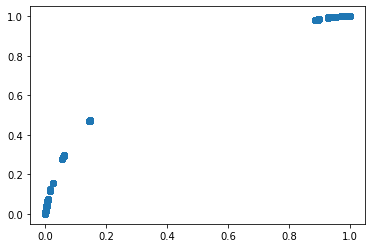

In [143]:
import matplotlib.pyplot as plt
plt.scatter(roc['roc_curve']['fpr'], roc['roc_curve']['tpr'])

# Apply the sentiment classifier to better understand the Giraffe reviews

In [144]:
products['predicted_sentiment'] = model.predict(products, output_type = 'probability')

In [145]:
predict = products['name','review','predicted_sentiment']
predict [0:3]

name,review,predicted_sentiment
Planetwise Wipe Pouch,it came early and was notdisappointed. i love ...,0.936781924479937
Annas Dream Full Quiltwith 2 Shams ...,Very soft and comfortableand warmer than it ...,0.7919288370624453
Stop Pacifier Suckingwithout tears with ...,This is a product wellworth the purchase. I ...,0.9829620803909053


In [146]:
acc = predict.sort('predicted_sentiment',ascending = False)

In [147]:
acc[0]['review']

"Check and recheck the K'Tan for size issues before letting your guard down and wearing..... NO ISSUES OCCURED, however, I thought I was good to go, and then realized that this large was different than the large I had been given before it.... Odd, but, fabric.... This makes the moby wrap appear like a midevil torture devise (and bonus! you wont have to worry about some Baby-Wearing freak watching you in the parking lot at the mall as you struggle to turn a bolt of fabric into what the KTan has simplified...seriously! Dad approved!!!!! (and if the moby is your thing, that's cool, just, perhaps, realize that its not as easy as everyone thinks to wrap that amount of fabric around yourself evenly, snug, comfortable and without mummifying yourself and lord help you, your baby!  Another bonus to the KTAN, issue with baby, takes only a second to move her out of the KTAN, but in a moby.... We thought for the first two days after returning the moby &#34;have you seen Katy?&#34;love it, love it,

In [148]:
acc[-1]['review']

'Terrible and Boring -  Boring and Terrible Terrible and Boring -  Boring and Terrible Terrible and Boring -  Boring and Terrible.  It  it looks so much more interactive than it is.  It is just a cheesey &#34;calculator&#34; style toy - if you can actually call it a toy.  My 2 year old literally started crying when she got this.'

# Examine the weights

In [149]:
model.coefficients

name,index,class,value,stderr
(intercept),None,1,1.3365913848877558,0.008929969787656753
awesome,None,1,1.133534666034145,0.08399643983187526
great,None,1,0.8630655001196618,0.018955052444377323
fantastic,None,1,0.8858047568814295,0.11167591293399656
amazing,None,1,1.1000933113660283,0.09954776260465983
love,None,1,1.3592688669225153,0.028068300152099435
horrible,None,1,-2.251335236759093,0.08020249388788442
bad,None,1,-0.9914778800650565,0.03848428664699063
terrible,None,1,-2.223661436085127,0.07731736203785755
awful,None,1,-2.0529082040313513,0.10099735435259259


In [173]:
model.coefficients.sort('value', ascending = False)

name,index,class,value,stderr
love,None,1,1.3592688669225153,0.028068300152099435
(intercept),None,1,1.3365913848877558,0.008929969787656753
awesome,None,1,1.133534666034145,0.08399643983187526
amazing,None,1,1.1000933113660283,0.09954776260465983
fantastic,None,1,0.8858047568814295,0.11167591293399656
great,None,1,0.8630655001196618,0.018955052444377323
wow,None,1,-0.009538236067678897,0.1604641122471166
bad,None,1,-0.9914778800650565,0.03848428664699063
hate,None,1,-1.3484407222463124,0.07715698604297333
awful,None,1,-2.0529082040313513,0.10099735435259259


In [183]:
a = model.coefficients.sort('value', ascending = False)
a.print_rows(num_rows = 12)

+-------------+-------+-------+-----------------------+----------------------+
|     name    | index | class |         value         |        stderr        |
+-------------+-------+-------+-----------------------+----------------------+
|     love    |  None |   1   |   1.3592688669225153  | 0.028068300152099435 |
| (intercept) |  None |   1   |   1.3365913848877558  | 0.008929969787656753 |
|   awesome   |  None |   1   |   1.133534666034145   | 0.08399643983187526  |
|   amazing   |  None |   1   |   1.1000933113660283  | 0.09954776260465983  |
|  fantastic  |  None |   1   |   0.8858047568814295  | 0.11167591293399656  |
|    great    |  None |   1   |   0.8630655001196618  | 0.018955052444377323 |
|     wow     |  None |   1   | -0.009538236067678897 |  0.1604641122471166  |
|     bad     |  None |   1   |  -0.9914778800650565  | 0.03848428664699063  |
|     hate    |  None |   1   |  -1.3484407222463124  | 0.07715698604297333  |
|    awful    |  None |   1   |  -2.0529082040313513

In [151]:
model.coefficients.sort('value', ascending = False)[0]['name']

'love'

In [152]:
model.evaluate(test_data)

{'accuracy': 0.8463848186404036,
 'auc': 0.6936022046674926,
 'confusion_matrix': Columns:
 	target_label	int
 	predicted_label	int
 	count	int
 
 Rows: 4
 
 Data:
 +--------------+-----------------+-------+
 | target_label | predicted_label | count |
 +--------------+-----------------+-------+
 |      1       |        0        |  159  |
 |      0       |        0        |  371  |
 |      0       |        1        |  4957 |
 |      1       |        1        | 27817 |
 +--------------+-----------------+-------+
 [4 rows x 3 columns],
 'f1_score': 0.9157860082304526,
 'log_loss': 0.3962265467087378,
 'precision': 0.8487520595594068,
 'recall': 0.9943165570488991,
 'roc_curve': Columns:
 	threshold	float
 	fpr	float
 	tpr	float
 	p	int
 	n	int
 
 Rows: 100001
 
 Data:
 +-----------+--------------------+-----+-------+------+
 | threshold |        fpr         | tpr |   p   |  n   |
 +-----------+--------------------+-----+-------+------+
 |    0.0    |        1.0         | 1.0 | 27976 | 532

#  Interpreting the difference in performance between the models

In [163]:
diaper_champ_reviews = products[products['name'] == 'Baby Trend Diaper Champ']

In [165]:
diaper_champ_reviews[0:3]

Columns:
	name	str
	review	str
	rating	float
	word_count	dict
	awesome	float
	great	float
	fantastic	float
	amazing	float
	love	float
	horrible	int
	bad	float
	terrible	int
	awful	int
	wow	int
	hate	int
	sentiment	int
	predicted_sentiment	float

Rows: 3

Data:
+-------------------------+-------------------------------+--------+
|           name          |             review            | rating |
+-------------------------+-------------------------------+--------+
| Baby Trend Diaper Champ | Ok - newsflash.  Diapers a... |  4.0   |
| Baby Trend Diaper Champ | My husband and I selected ... |  1.0   |
| Baby Trend Diaper Champ | Excellent diaper disposal ... |  5.0   |
+-------------------------+-------------------------------+--------+
+-------------------------------+---------+-------+-----------+---------+------+
|           word_count          | awesome | great | fantastic | amazing | love |
+-------------------------------+---------+-------+-----------+---------+------+
| {'convenient': 1.0, 'more'... |   0.0   |  0.0  |    0.0    |   0.0   | 0.0  |
| {'system': 1.0, 'try': 1.0... |   0.0   |  0.0  |    0.0    |   0.0   | 0.0  |
| {'nose': 1.0, 'for': 2.0, ... |   0.0   |  0.0  |    0.0    |   0.0   | 0.0  |
+-------------------------------+---------+-------+-----------+---------+------+
+----------+-----+----------+-------+-----+------+-----------+
| horrible | bad | terrible | awful | wow | hate | sentiment |
+----------+-----+----------+-------+-----+------+-----------+
|    0     | 0.0 |    0     |   0   |  0  |  0   |     1     |
|    0     | 0.0 |    0     |   0   |  0  |  0   |     0     |
|    0     | 0.0 |    0     |   0   |  0  |  0   |     1     |
+----------+-----+----------+-------+-----+------+-----------+
+---------------------+
| predicted_sentiment |
+---------------------+
|  0.7919288370624453 |
|  0.7919288370624453 |
|  0.7919288370624453 |
+---------------------+
[3 rows x 17 columns]

# Train the model using word_count

In [166]:
old_model = tc.logistic_classifier.create(train_data,target='sentiment', features=['word_count'], validation_set=test_data)

Logistic regression:

--------------------------------------------------------

Number of examples          : 133448

Number of classes           : 2

Number of feature columns   : 1

Number of unpacked features : 57356

Number of coefficients      : 57357

Starting L-BFGS

--------------------------------------------------------

+-----------+----------+-----------+--------------+-------------------+---------------------+

| Iteration | Passes   | Step size | Elapsed Time | Training Accuracy | Validation Accuracy |

+-----------+----------+-----------+--------------+-------------------+---------------------+

| 0         | 4        | 0.250000  | 0.503823     | 0.841421          | 0.840019            |

| 1         | 9        | 3.250000  | 1.225655     | 0.931359          | 0.911362            |

| 2         | 11       | 2.669978  | 1.583097     | 0.938650          | 0.916466            |

| 3         | 12       | 2.669978  | 1.824318     | 0.927417          | 0.901814            |

| 4         | 14       | 1.326072  | 2.176953     | 0.945200          | 0.918088            |

| 9         | 20       | 1.326072  | 3.404730     | 0.977654          | 0.917698            |

+-----------+----------+-----------+--------------+-------------------+---------------------+

In [167]:
diaper_champ_reviews['diaper_pred_old'] = old_model.predict(diaper_champ_reviews, output_type='probability')
diaper_champ_reviews[0:3]

Columns:
	name	str
	review	str
	rating	float
	word_count	dict
	awesome	float
	great	float
	fantastic	float
	amazing	float
	love	float
	horrible	int
	bad	float
	terrible	int
	awful	int
	wow	int
	hate	int
	sentiment	int
	predicted_sentiment	float
	diaper_pred_old	float

Rows: 3

Data:
+-------------------------+-------------------------------+--------+
|           name          |             review            | rating |
+-------------------------+-------------------------------+--------+
| Baby Trend Diaper Champ | Ok - newsflash.  Diapers a... |  4.0   |
| Baby Trend Diaper Champ | My husband and I selected ... |  1.0   |
| Baby Trend Diaper Champ | Excellent diaper disposal ... |  5.0   |
+-------------------------+-------------------------------+--------+
+-------------------------------+---------+-------+-----------+---------+------+
|           word_count          | awesome | great | fantastic | amazing | love |
+-------------------------------+---------+-------+-----------+---------+------+
| {'convenient': 1.0, 'more'... |   0.0   |  0.0  |    0.0    |   0.0   | 0.0  |
| {'system': 1.0, 'try': 1.0... |   0.0   |  0.0  |    0.0    |   0.0   | 0.0  |
| {'nose': 1.0, 'for': 2.0, ... |   0.0   |  0.0  |    0.0    |   0.0   | 0.0  |
+-------------------------------+---------+-------+-----------+---------+------+
+----------+-----+----------+-------+-----+------+-----------+
| horrible | bad | terrible | awful | wow | hate | sentiment |
+----------+-----+----------+-------+-----+------+-----------+
|    0     | 0.0 |    0     |   0   |  0  |  0   |     1     |
|    0     | 0.0 |    0     |   0   |  0  |  0   |     0     |
|    0     | 0.0 |    0     |   0   |  0  |  0   |     1     |
+----------+-----+----------+-------+-----+------+-----------+
+---------------------+-----------------------+
| predicted_sentiment |    diaper_pred_old    |
+---------------------+-----------------------+
|  0.7919288370624453 |   0.9950122935570306  |
|  0.7919288370624453 | 5.901414532903105e-13 |
|  0.7919288370624453 |   0.9999996193960345  |
+---------------------+-----------------------+
[3 rows x 18 columns]

In [168]:
diaper_champ_reviews.sort('diaper_pred_old', ascending = False)

name,review,rating,word_count,awesome,great,fantastic
Baby Trend Diaper Champ,I read a review belowthat can explain exactly ...,4.0,"{'key': 1.0, 'have': 1.0,'pieces': 1.0, 'betwe ...",0.0,0.0,0.0
Baby Trend Diaper Champ,I have never written areview for Amazon but I ...,5.0,"{'priceless': 1.0,'knows': 1.0, 'parent': ...",0.0,0.0,0.0
Baby Trend Diaper Champ,I originally put thisitem on my baby registry ...,5.0,"{'price': 1.0,'suggestions': 1.0, ...",0.0,0.0,0.0
Baby Trend Diaper Champ,Baby Luke can turn aclean diaper to a dirty ...,5.0,"{'around': 1.0, 'any':1.0, 't': 1.0, 'isn': ...",0.0,1.0,0.0
Baby Trend Diaper Champ,Diaper Champ or DiaperGenie? That was my ...,5.0,"{'either': 1.0, 'be':1.0, 't': 1.0, 'not': ...",0.0,1.0,0.0
Baby Trend Diaper Champ,I am one of those super-critical shoppers who ...,5.0,"{'hope': 1.0, 'make':1.0, 'slower': 1.0, ...",0.0,0.0,0.0
Baby Trend Diaper Champ,I LOOOVE this diaperpail! Its the easies ...,5.0,"{'buy': 1.0, 'product':1.0, 'recommend': 1.0, ...",0.0,0.0,0.0
Baby Trend Diaper Champ,"As a first time mother, Iwanted to get the best ...",5.0,"{'ll': 1.0, 'baby': 1.0,'recommended': 1.0, ' ...",0.0,0.0,0.0
Baby Trend Diaper Champ,I see that there arecomplaints of stinkiness ...,5.0,"{'very': 1.0, 'told':1.0, 'all': 1.0, ...",0.0,0.0,0.0
Baby Trend Diaper Champ,I have a 10 year olddaughter and an 8 month ...,5.0,"{'sorry': 1.0, 'be': 1.0,'you': 2.0, 'sell': 1.0, ...",0.0,0.0,0.0


In [169]:
diaper_champ_reviews[0]['review']

"Ok - newsflash.  Diapers are just smelly.  We've had this pail for 2.5 years now.  It was our first and primary one.  There were no major smell problems until after one year, when our son started eating solids.  Also, we change the bag twice weekly as 3 days is about the max for smell-containment.  Around 20-22 months we started shopping for a container that would be less smelly and didn't find one as good.  (We have a cheaper one upstairs which broke immediately and always stunk!)  We finally just put the Diaper Champ in the attic a few months ago and use the cheap one with the flip-up lid - mainly since the cheapo fits inside the cabinet and we didn't notice a big difference in smell-control.  (The most helpful action is to tie the dirty diapers inside a small plastic bag before putting them in the pail.)A couple of our friends have this pail and were pleased until the children started eating solid food and things got stinkier - but that's pretty much the consensus according to many

In [171]:
diaper_champ_reviews[2]['review']

'Excellent diaper disposal unit.  I used it in conjunction with Glad 3ply kitchen trash bags with odor control (scented).  I am soooo pleased with this product!!! A wise investment for the pocketbook & for the nose!!!'